In [10]:
import pandas as pd
import yfinance as yf
import seaborn as sns
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
plt.rcParams['figure.figsize'] = [20, 10]

In [1]:
def lines():
    for y, color, linestyle in [(0, 'black', '-'),
                                (1.0, 'green', '-'),
                                (2.5, 'green', '--'),
                                (3, 'magenta', '--'),
                                (-1.0, 'red', '--'),
                                (-2.5, 'red', '--'),
                                (-3, 'magenta', '--')]:
        plt.axhline(y=y, color=color, linestyle=linestyle)

In [4]:
path =r'D:\rupeelog\repo\projectdata\code\live_data\ind_nifty500list.csv'
tickers=pd.read_csv(path)
tickers['Symbol']=tickers['Symbol']+str('.NS')
download=(tickers['Symbol'].to_list())

In [6]:
df=yf.download(tickers=download,start="2019-01-01")['Close']

[*********************100%%**********************]  499 of 499 completed


In [7]:
df.fillna(method='bfill',inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_55596\1626352436.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [13]:
# Calculate percentage change
df2 = df.pct_change().dropna()

# Calculate correlation matrix
corr = df2.corr()

# Print the columns of the correlation DataFrame
#print("Columns in correlation DataFrame:", corr.columns)
# Solution: Rename the index before resetting
corr.index.name = None  # Temporarily remove the index name
corr_long = corr.stack().reset_index()  # Now stack and reset index
corr_long.columns = ['stock1', 'stock2', 'correlation']  # Rename columns for clarity

# Optionally, drop duplicate pairs (if you want unique pairs)
corr_long = corr_long[corr_long['stock1'] < corr_long['stock2']]

# Display the long format DataFrame
print("\nLong Format Correlation DataFrame:")
print(corr_long)


Long Format Correlation DataFrame:
               stock1         stock2  correlation
1           360ONE.NS     3MINDIA.NS     0.153527
2           360ONE.NS    AARTIIND.NS     0.163636
3           360ONE.NS       AAVAS.NS     0.169223
4           360ONE.NS         ABB.NS     0.125731
5           360ONE.NS  ABBOTINDIA.NS     0.155205
...               ...            ...          ...
247502  ZENSARTECH.NS      ZOMATO.NS     0.179858
247503  ZENSARTECH.NS   ZYDUSLIFE.NS     0.140463
248001   ZFCVINDIA.NS      ZOMATO.NS     0.083946
248002   ZFCVINDIA.NS   ZYDUSLIFE.NS     0.066739
248501      ZOMATO.NS   ZYDUSLIFE.NS     0.156487

[124251 rows x 3 columns]


<Axes: xlabel='Ticker', ylabel='Ticker'>

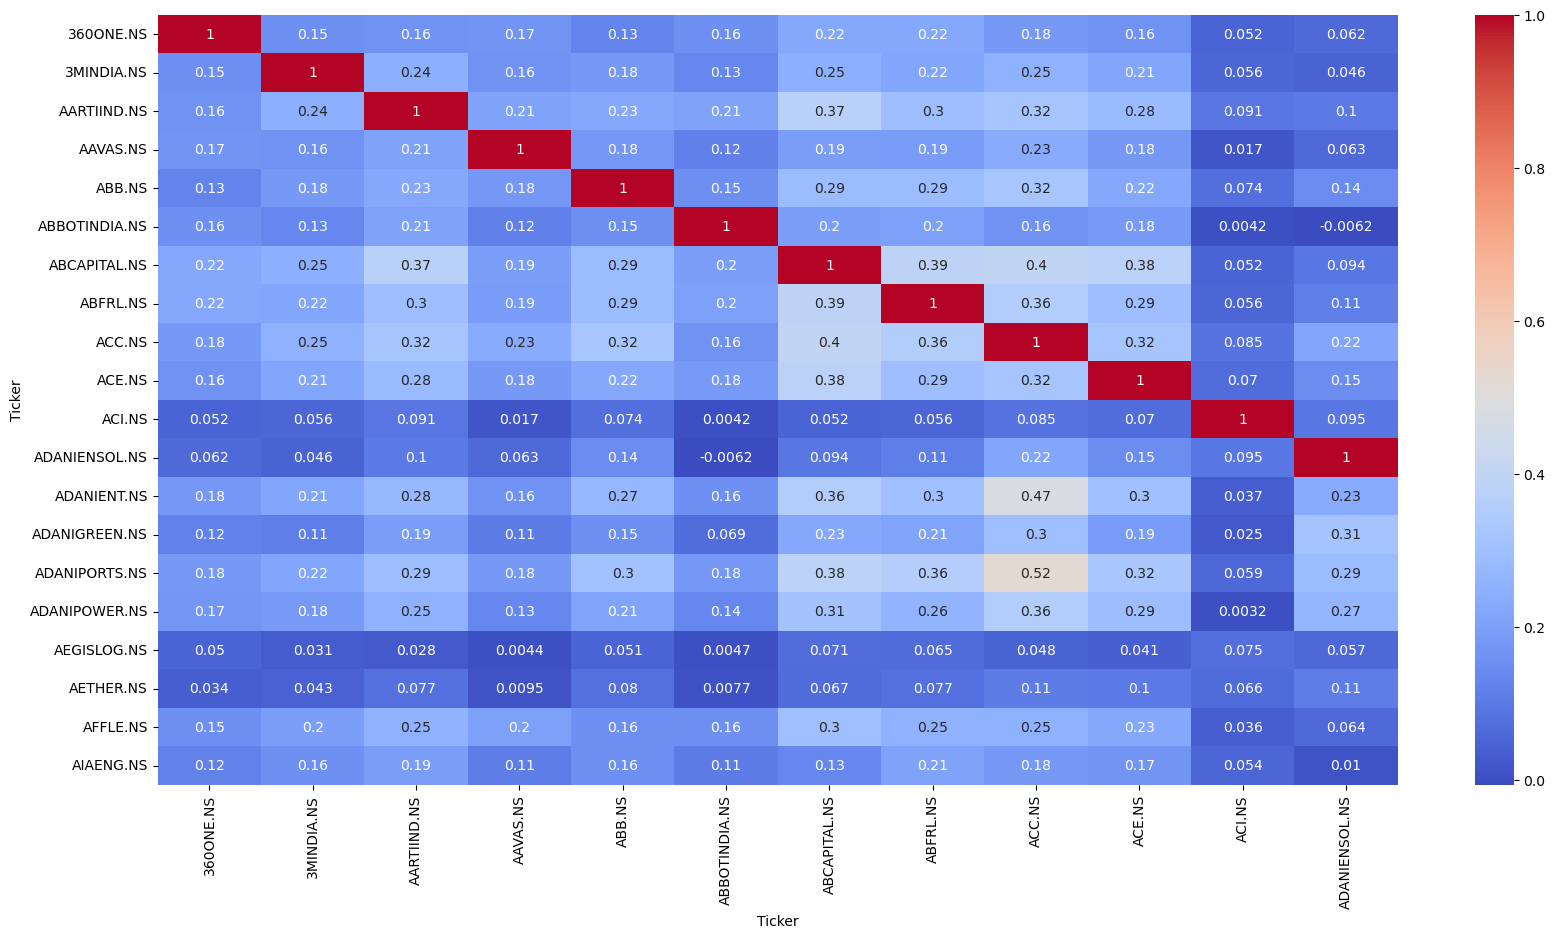

In [11]:
##Visualizing the correlation matrix

sns.heatmap(corr.iloc[:20, :12]
, annot=True, cmap='coolwarm')

In [14]:
##The final dataframe without repetitions
Finale=corr_long.loc[corr_long['correlation']!=1]
Finale=Finale.sort_values(by='correlation', ascending=False)
Finale=Finale.drop_duplicates('correlation')

In [15]:
##Selecting stocks with atleast 0.5 corrcoef value

Finale=Finale.loc[Finale['correlation']>0.5]

In [16]:
Finale

,stock1,stock2,correlation
4018,ACC.NS,AMBUJACEM.NS,0.826073
25502,BAJAJFINSV.NS,BAJFINANCE.NS,0.825207
179031,PFC.NS,RECLTD.NS,0.818555
29027,BANKBARODA.NS,CANBK.NS,0.777639
92016,GRAPHITE.NS,HEG.NS,0.774715
...,...,...,...
159627,MOTHERSON.NS,TATAMOTORS.NS,0.501015
67811,DLF.NS,TATAMOTORS.NS,0.500963
108147,IDBI.NS,PNB.NS,0.500771
34794,BHEL.NS,PNB.NS,0.500733


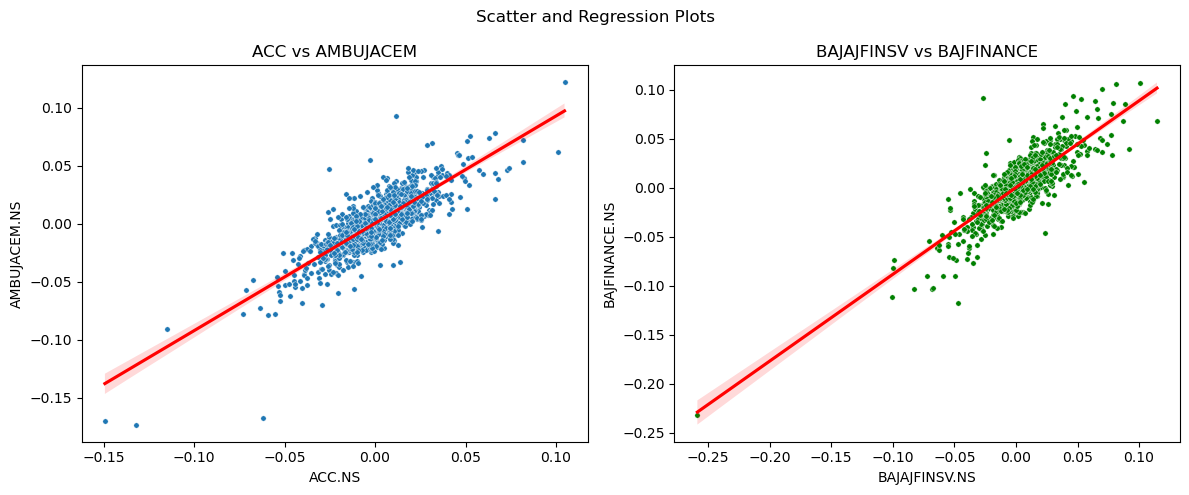

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# First subplot
sns.scatterplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, ax=ax1,s=15)
sns.regplot(x=df2['ACC.NS'], y=df2['AMBUJACEM.NS'], data=df, color='red', scatter=False, ax=ax1)
ax1.set_xlabel('ACC.NS')
ax1.set_ylabel('AMBUJACEM.NS')
ax1.set_title('ACC vs AMBUJACEM')

# Second subplot
sns.scatterplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, ax=ax2,s=15,color='green')
sns.regplot(x=df2['BAJAJFINSV.NS'], y=df2['BAJFINANCE.NS'], data=df, color='red', scatter=False, ax=ax2)
ax2.set_xlabel('BAJAJFINSV.NS')
ax2.set_ylabel('BAJFINANCE.NS')
ax2.set_title('BAJAJFINSV vs BAJFINANCE')

fig.suptitle('Scatter and Regression Plots')

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()